In [2]:
import numpy as np
import pandas as pd

# <center> ========= PART 1: OBTAIN THE DATA =========


In [3]:
df_airQuality = pd.read_csv("https://raw.githubusercontent.com/CenticMurcia/proyecto-CO2/master/Datos%20CSV/21-12-21-datos.csv",
                 sep=";",
                 decimal=",",
                 parse_dates=['time_index'],
                 dayfirst=True,
                 index_col="time_index").drop(["ocupacion"], axis=1)

df_ocupation = pd.read_csv("https://raw.githubusercontent.com/CenticMurcia/proyecto-CO2/master/Datos%20CSV/ctcount-acces-data-RAW-2020-data.csv",
                 sep=",",
                 decimal=",",
                 parse_dates=['time_index'],
                 dayfirst=True,
                 index_col="time_index").drop(["endpoint", "devicename"], axis=1)
df_ocupation['ocupacion'] = pd.to_numeric(df_ocupation['numberofincoming']) - pd.to_numeric(df_ocupation['numberofoutgoing'])

display(df_airQuality)
display(df_ocupation)

,temperature,relativehumidity,pm25,pm10,numberofincoming,numberofoutgoing,co2
time_index,,,,,,,
2021-09-27 10:00:00,27.34,49.74,11.88,13.00,68.0,88.0,594.85
2021-09-27 10:25:00,27.66,49.45,6.75,7.75,186.0,265.0,590.77
2021-09-27 10:30:00,27.94,49.70,5.38,6.38,354.0,492.0,578.66
2021-09-27 10:35:00,28.03,48.59,4.71,5.71,80.0,114.0,581.25
2021-09-27 10:40:00,28.09,48.43,3.62,4.62,467.0,642.0,586.75
...,...,...,...,...,...,...,...
2021-12-31 23:35:00,18.81,50.12,19.40,20.40,0.0,0.0,409.35
2021-12-31 23:40:00,18.82,50.13,19.80,20.80,0.0,0.0,408.84
2021-12-31 23:45:00,18.78,50.07,20.80,21.80,0.0,0.0,408.72


,numberofincoming,numberofoutgoing,ocupacion
time_index,,,
2021-09-23 07:06:29,2.00,2.00,0.0
2021-09-23 07:07:29,2.00,2.00,0.0
2021-09-23 07:08:29,2.00,2.00,0.0
2021-09-23 07:09:29,2.00,2.00,0.0
2021-09-23 07:10:29,2.00,2.00,0.0
...,...,...,...
2022-01-31 23:55:57,0.00,0.00,0.0
2022-01-31 23:56:57,0.00,0.00,0.0
2022-01-31 23:57:57,0.00,0.00,0.0


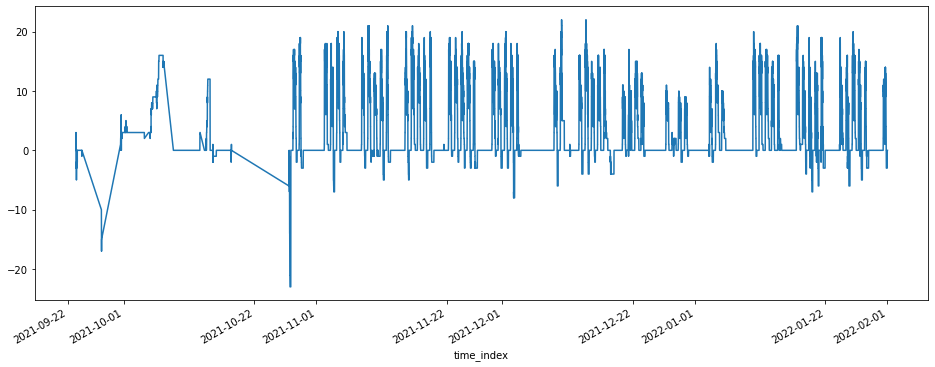

In [4]:
df_ocupation.ocupacion.plot.line(figsize=(16, 6));

In [5]:
df_ocupation = df_ocupation.set_index(df_ocupation.index.round('5min'))    # Round every moment to the nearest 5 minute interval
df_ocupation = df_ocupation.groupby(["time_index"]).mean() # Select the most frequecuent value to each  5 minute interval
df_ocupation

,ocupacion
time_index,
2021-09-23 07:05:00,0.0
2021-09-23 07:10:00,0.0
2021-09-23 07:15:00,0.0
2021-09-23 07:20:00,0.0
2021-09-23 07:25:00,0.0
...,...
2022-01-31 23:40:00,0.0
2022-01-31 23:45:00,0.0
2022-01-31 23:50:00,0.0


In [6]:
df = df_airQuality.join(df_ocupation, how='left').drop(["numberofincoming", "numberofoutgoing"], axis=1)
df

,temperature,relativehumidity,pm25,pm10,co2,ocupacion
time_index,,,,,,
2021-09-27 10:00:00,27.34,49.74,11.88,13.00,594.85,-10.000000
2021-09-27 10:25:00,27.66,49.45,6.75,7.75,590.77,-16.000000
2021-09-27 10:30:00,27.94,49.70,5.38,6.38,578.66,-15.272727
2021-09-27 10:35:00,28.03,48.59,4.71,5.71,581.25,-17.000000
2021-09-27 10:40:00,28.09,48.43,3.62,4.62,586.75,-16.272727
...,...,...,...,...,...,...
2021-12-31 23:35:00,18.81,50.12,19.40,20.40,409.35,0.000000
2021-12-31 23:40:00,18.82,50.13,19.80,20.80,408.84,0.000000
2021-12-31 23:45:00,18.78,50.07,20.80,21.80,408.72,0.000000


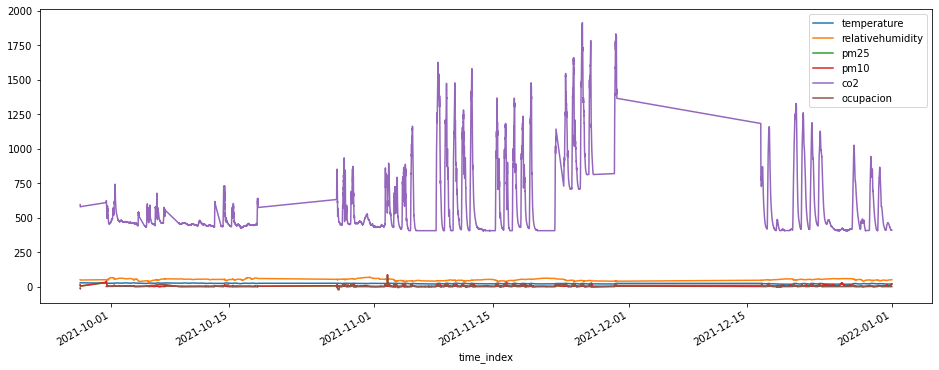

In [7]:
df.plot.line(figsize=(16, 6));

## Train data

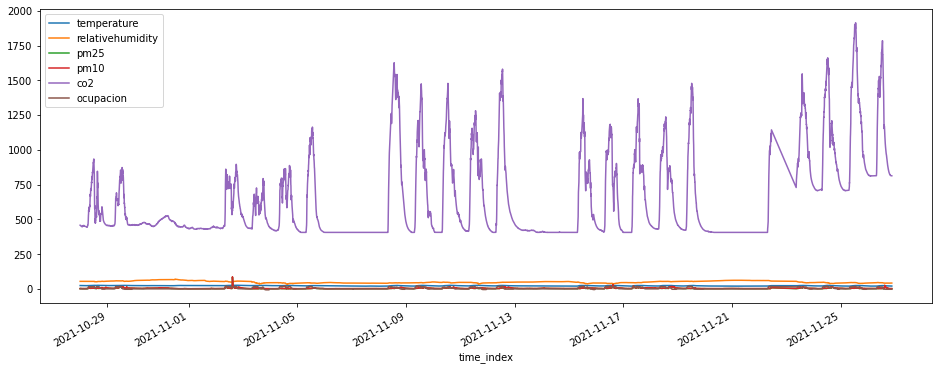

In [8]:
df_train = df.loc['2021-10-28':'2021-11-28']
df_train.plot.line(figsize=(16, 6));

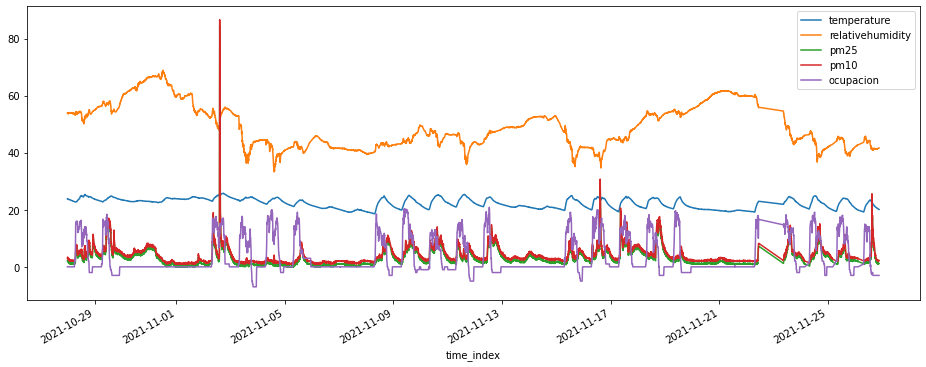

In [9]:
df_train.drop(["co2"], axis=1).plot.line(figsize=(16, 6));

## Test data

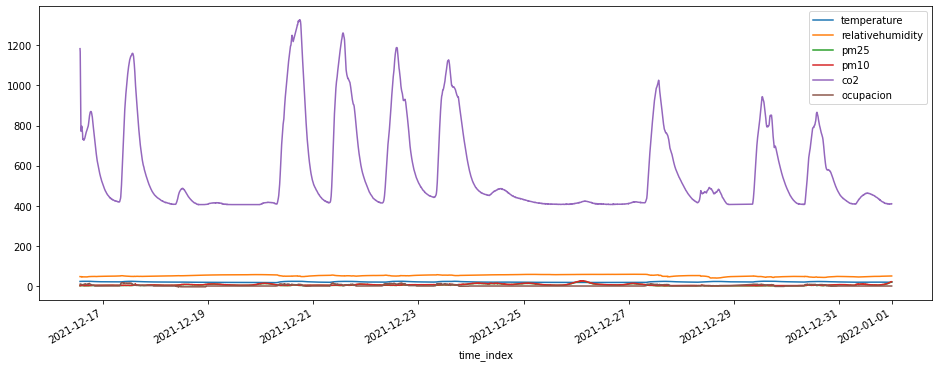

In [10]:
df_test  = df.loc['2021-12-10':'2021-12-31']
df_test.plot.line(figsize=(16, 6));

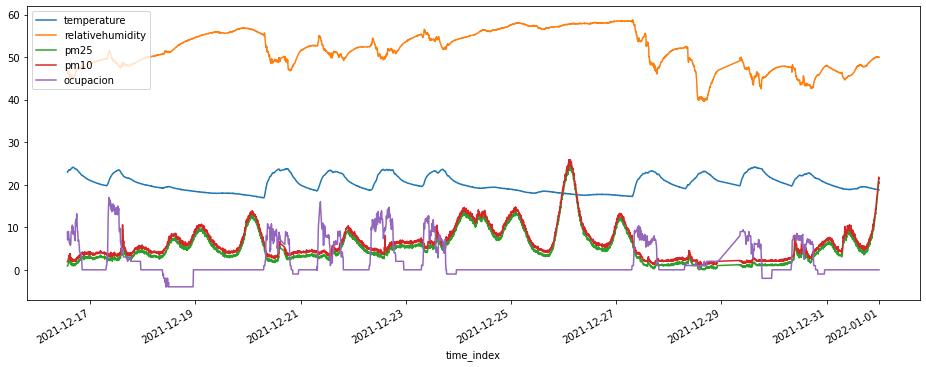

In [11]:
df_test.drop(["co2"], axis=1).plot.line(figsize=(16, 6));

# <center> ========= PART 2: FEATURE ENG. =========

## 2.1 Normalice

## 2.2 Create lags

In [12]:
def create_lags(df, min, max):

    df_xy = pd.DataFrame()
    
    for var_name in df.columns:
        for lag in range(min,(max+1)):
            
            if lag<0: # Negative lag -> Positive shift (move downwards) -> Data becomes the past
                new_var_name = var_name + "_prev" + str(-lag*5) + "mins"
                df_xy[new_var_name] = df[var_name].shift(-lag)
            elif lag==0:
                new_var_name = var_name + "_actual"
                df_xy[new_var_name] = df[var_name]
            elif lag>0: # Positive lag -> Negative shift (move upwards) -> Data becomes the future
                if var_name in ["co2", "pm10", "pm25"]:
                    new_var_name = var_name + "_next" + str(lag*5) + "mins"
                    df_xy[new_var_name] = df[var_name].shift(-lag)

    # FINAL POST PROCESING: REMOVE MISSING VALUES (from head and tail)
    df_xy.dropna(axis='rows', inplace=True)

    return df_xy.filter(regex='prev|actual'), df_xy.filter(regex='next')

train_x, train_y = create_lags(df_train, min=-3, max=4)
test_x,  test_y  = create_lags(df_test,  min=-3, max=4)

In [13]:
print("Train X"); display(train_x.head())
print("Train Y"); display(train_y.head())

Train X


,temperature_prev15mins,temperature_prev10mins,temperature_prev5mins,temperature_actual,relativehumidity_prev15mins,relativehumidity_prev10mins,relativehumidity_prev5mins,relativehumidity_actual,pm25_prev15mins,pm25_prev10mins,...,pm10_prev5mins,pm10_actual,co2_prev15mins,co2_prev10mins,co2_prev5mins,co2_actual,ocupacion_prev15mins,ocupacion_prev10mins,ocupacion_prev5mins,ocupacion_actual
time_index,,,,,,,,,,,,,,,,,,,,,
2021-10-28 00:15:00,23.85,23.87,23.84,23.81,53.88,53.88,53.82,53.77,2.00,2.29,...,3.43,3.00,457.68,457.62,456.57,456.17,0.0,0.0,0.0,0.0
2021-10-28 00:20:00,23.87,23.84,23.81,23.80,53.88,53.82,53.77,53.83,2.29,2.43,...,3.00,3.00,457.62,456.57,456.17,455.89,0.0,0.0,0.0,0.0
2021-10-28 00:25:00,23.84,23.81,23.80,23.80,53.82,53.77,53.83,53.78,2.43,2.00,...,3.00,3.00,456.57,456.17,455.89,455.26,0.0,0.0,0.0,0.0
2021-10-28 00:30:00,23.81,23.80,23.80,23.74,53.77,53.83,53.78,53.73,2.00,2.00,...,3.00,3.00,456.17,455.89,455.26,453.98,0.0,0.0,0.0,0.0
2021-10-28 00:35:00,23.80,23.80,23.74,23.71,53.83,53.78,53.73,53.69,2.00,2.00,...,3.00,2.86,455.89,455.26,453.98,453.58,0.0,0.0,0.0,0.0


Train Y


,pm25_next5mins,pm25_next10mins,pm25_next15mins,pm25_next20mins,pm10_next5mins,pm10_next10mins,pm10_next15mins,pm10_next20mins,co2_next5mins,co2_next10mins,co2_next15mins,co2_next20mins
time_index,,,,,,,,,,,,
2021-10-28 00:15:00,2.00,2.00,2.00,1.86,3.00,3.00,3.00,2.86,455.89,455.26,453.98,453.58
2021-10-28 00:20:00,2.00,2.00,1.86,2.12,3.00,3.00,2.86,3.12,455.26,453.98,453.58,453.01
2021-10-28 00:25:00,2.00,1.86,2.12,1.62,3.00,2.86,3.12,2.62,453.98,453.58,453.01,451.59
2021-10-28 00:30:00,1.86,2.12,1.62,1.86,2.86,3.12,2.62,2.86,453.58,453.01,451.59,451.02
2021-10-28 00:35:00,2.12,1.62,1.86,1.75,3.12,2.62,2.86,2.75,453.01,451.59,451.02,450.60


## 2.3 Create deltas

# <center> ========= PART 3: MODEL =========

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler

######################## MODELS
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor(random_state=123)
model_2 = make_pipeline(StandardScaler(), Ridge(random_state=123))

model = model_2


### Train Random Forest

In [27]:
model.fit(train_x, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=123))])

In [30]:
### Test model
model.predict(test_x)

array([[  2.00322577,   2.01225437,   2.22607462, ..., 744.03598223,
        715.10084779, 715.4732845 ],
       [  1.39237107,   1.54805686,   1.96481682, ..., 731.6825123 ,
        732.14789673, 728.87068214],
       [  2.37770078,   2.62905223,   2.7632903 , ..., 794.31946711,
        797.21045638, 799.43788592],
       ...,
       [ 18.34634901,  17.71348147,  16.80141645, ..., 406.2344899 ,
        406.1523135 , 406.06190426],
       [ 18.57419907,  17.79017088,  16.81470987, ..., 408.02921146,
        408.0299022 , 408.34658604],
       [ 18.8003168 ,  17.99611971,  17.0266289 , ..., 408.19802671,
        408.38569054, 408.95811274]])

In [18]:
test_x.iloc[[0],:].values

array([[2.29500000e+01, 2.30200000e+01, 2.33100000e+01, 2.33900000e+01,
        4.68300000e+01, 4.65600000e+01, 4.62700000e+01, 4.64900000e+01,
        9.00000000e-01, 8.90000000e-01, 1.38000000e+00, 1.71000000e+00,
        1.90000000e+00, 1.89000000e+00, 2.38000000e+00, 2.71000000e+00,
        1.18336000e+03, 1.16676000e+03, 7.72100000e+02, 7.77730000e+02,
        8.81818182e+00, 7.00000000e+00, 9.00000000e+00, 9.00000000e+00]])

In [33]:
pred = model.predict(test_x.iloc[[0],:].values)
pred.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


(1, 12)

In [35]:
assert pred.shape==(1,13)

AssertionError: ignored

In [22]:
from joblib import dump, load
dump(model, 'ridge.joblib') 

['ridge.joblib']

In [23]:
!ls -lh

total 596M
-rw-r--r-- 1 root root 596M Jul 17 17:30 random_forest.joblib
-rw-r--r-- 1 root root 4.9K Jul 17 17:53 ridge.joblib
drwxr-xr-x 1 root root 4.0K Jul 13 13:43 sample_data


In [24]:
model_3 = make_pipeline(StandardScaler(), Ridge())
model_3 = load('ridge.joblib') 

In [25]:
model_3.predict(test_x.iloc[[0],:].values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[  2.00322577,   2.01225437,   2.22607462,   2.55588613,
          2.97786587,   3.0120432 ,   3.23112288,   3.57967529,
        768.20058553, 744.03598223, 715.10084779, 715.4732845 ]])

In [ ]:
test_y

,pm25_next5mins,pm25_next10mins,pm25_next15mins,pm25_next20mins,pm10_next5mins,pm10_next10mins,pm10_next15mins,pm10_next20mins,co2_next5mins,co2_next10mins,co2_next15mins,co2_next20mins
time_index,,,,,,,,,,,,
2021-12-16 14:05:00,1.50,2.12,2.43,2.12,2.50,3.12,3.43,3.12,783.88,789.09,795.21,796.62
2021-12-16 14:10:00,2.12,2.43,2.12,1.86,3.12,3.43,3.12,2.86,789.09,795.21,796.62,788.79
2021-12-16 14:15:00,2.43,2.12,1.86,1.75,3.43,3.12,2.86,2.75,795.21,796.62,788.79,776.53
2021-12-16 14:20:00,2.12,1.86,1.75,2.75,3.12,2.86,2.75,3.75,796.62,788.79,776.53,766.78
2021-12-16 14:25:00,1.86,1.75,2.75,2.43,2.86,2.75,3.75,3.43,788.79,776.53,766.78,758.88
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:15:00,18.10,18.70,19.10,19.40,19.10,19.70,20.10,20.40,408.77,409.15,409.86,409.35
2021-12-31 23:20:00,18.70,19.10,19.40,19.80,19.70,20.10,20.40,20.80,409.15,409.86,409.35,408.84
2021-12-31 23:25:00,19.10,19.40,19.80,20.80,20.10,20.40,20.80,21.80,409.86,409.35,408.84,408.72


In [ ]:
input_data_df = pd.read_csv("https://raw.githubusercontent.com/CenticMurcia/proyecto-CO2/master/App-flask/data.csv")
input_data_df

,Fecha,Hora,PersonasIn,PersonasOut,Personas,Temperatura,Humedad,CO2,PM10,PM25
0,11/07/2022,16:55:00,69,58,11,24.140154,39.624626,975.342285,1,0
1,11/07/2022,17:00:00,69,58,11,23.969254,38.989853,995.210510,1,0
2,11/07/2022,17:05:00,69,58,11,23.969254,38.989853,995.210510,1,0
3,11/07/2022,17:10:00,69,58,11,23.926527,39.337757,1047.265381,1,0
4,11/07/2022,17:15:00,69,58,11,23.873121,39.655147,1051.493896,1,0
5,11/07/2022,17:20:00,69,58,11,23.787670,39.783321,1045.553955,1,0
6,11/07/2022,17:25:00,69,58,11,23.787670,39.801632,1055.552368,1,0
7,11/07/2022,17:30:00,71,60,11,23.755627,40.021362,1054.880127,1,0
8,11/07/2022,17:35:00,71,60,11,23.691540,39.758907,1082.598511,1,0
9,11/07/2022,17:40:00,72,61,11,23.787670,39.826046,1127.094604,2,1


In [ ]:
in_dat = input_data_df[["Temperatura", "Humedad", "PM25", "PM10", "CO2", "Personas"]].tail(4)
in_dat

,Temperatura,Humedad,PM25,PM10,CO2,Personas
18,23.531319,40.094604,0,1,1124.179809,6
19,23.499275,39.752804,1,2,1150.804443,5
20,23.542000,39.673458,0,1,1150.305420,5
21,23.435186,39.887085,0,1,1132.763428,5


In [ ]:
np.concatenate((in_dat["Temperatura"].values, in_dat["Humedad"].values))

array([23.5313186, 23.4992752, 23.5419998, 23.4351863, 40.0946044,
       39.7528038, 39.673458 , 39.8870849])

In [ ]:
pred_np_matrix = np.array([[  1.5137,   1.8456,   1.887 ,   2.5185,   2.5037,   2.8493,
                                      2.9192,   3.412 , 760.1504, 766.1264, 779.5188, 755.173 ]])[0]

In [ ]:
pred_np_matrix[0:4]

array([1.5137, 1.8456, 1.887 , 2.5185])

In [ ]:
test_x.columns

Index(['temperature_prev15mins', 'temperature_prev10mins',
       'temperature_prev5mins', 'temperature_actual',
       'relativehumidity_prev15mins', 'relativehumidity_prev10mins',
       'relativehumidity_prev5mins', 'relativehumidity_actual',
       'pm25_prev15mins', 'pm25_prev10mins', 'pm25_prev5mins', 'pm25_actual',
       'pm10_prev15mins', 'pm10_prev10mins', 'pm10_prev5mins', 'pm10_actual',
       'co2_prev15mins', 'co2_prev10mins', 'co2_prev5mins', 'co2_actual',
       'ocupacion_prev15mins', 'ocupacion_prev10mins', 'ocupacion_prev5mins',
       'ocupacion_actual'],
      dtype='object')

In [ ]:
in_dat.to_numpy().flatten("F").reshape(1,-1)

array([[2.35313186e+01, 2.34992752e+01, 2.35419998e+01, 2.34351863e+01,
        4.00946044e+01, 3.97528038e+01, 3.96734580e+01, 3.98870849e+01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.12417981e+03, 1.15080444e+03, 1.15030542e+03, 1.13276343e+03,
        6.00000000e+00, 5.00000000e+00, 5.00000000e+00, 5.00000000e+00]])

In [ ]:
2.35313186e+01

23.5313186

In [ ]:
in_dat

NameError: ignored